# 메뉴추천 시스템
## 데이터 준비

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('TB_RECIPE_SEARCH-220701.csv', encoding='cp949')

In [3]:
df1.head(3)

,RCP_SNO,RCP_TTL,CKG_NM,RGTR_ID,RGTR_NM,INQ_CNT,RCMM_CNT,SRAP_CNT,CKG_MTH_ACTO_NM,CKG_STA_ACTO_NM,CKG_MTRL_ACTO_NM,CKG_KND_ACTO_NM,CKG_IPDC,CKG_MTRL_CN,CKG_INBUN_NM,CKG_DODF_NM,CKG_TIME_NM,FIRST_REG_DT
0,128671,어묵김말이,어묵김말이,skfo0701,꽃날,9592,6,66,튀김,간식,가공식품류,디저트,맛있는 김말이에 쫄깃함을 더한 어묵 김말이예요-,[재료] 어묵 2개| 김밥용김 3장| 당면 1움큼| 양파 1/2개| 당근 1/2개|...,2인분,초급,60분이내,2.007000e+13
1,128892,두부에 꼬리가 달렸어요!!,알밥,skfo0701,꽃날,5538,3,26,부침,일상,해물류,밑반찬,꼬리가 너-무- 매력적인 두부새우전. 두부와 야채를 한번에!! 영양까지 만점인 두부...,[재료] 두부 1/2모| 당근 1/2개| 고추 2개| 브로콜리 1/4개| 새우 4마...,3인분,초급,30분이내,2.007000e+13
2,128932,입안에서 톡톡톡,두부새우전,skfo0701,꽃날,6802,8,36,굽기,일상,해물류,밥/죽/떡,간단하게 만들어 보는 알이 톡톡톡 알밥♥ 다 먹고 누룽지까지 싹싹 긁어먹는게 최고죠...,[재료] 밥 1+1/2공기| 당근 1/4개| 치자단무지 1/2개| 신김치 1쪽| 무...,2인분,초급,30분이내,2.007000e+13


### 불필요한 컬럼 제거

In [4]:
df1.columns

Index(['RCP_SNO', 'RCP_TTL', 'CKG_NM', 'RGTR_ID', 'RGTR_NM', 'INQ_CNT',
       'RCMM_CNT', 'SRAP_CNT', 'CKG_MTH_ACTO_NM', 'CKG_STA_ACTO_NM',
       'CKG_MTRL_ACTO_NM', 'CKG_KND_ACTO_NM', 'CKG_IPDC', 'CKG_MTRL_CN',
       'CKG_INBUN_NM', 'CKG_DODF_NM', 'CKG_TIME_NM', 'FIRST_REG_DT'],
      dtype='object')

In [5]:
df2 = df1.copy()

In [6]:
df2.head(3)

,RCP_SNO,RCP_TTL,CKG_NM,RGTR_ID,RGTR_NM,INQ_CNT,RCMM_CNT,SRAP_CNT,CKG_MTH_ACTO_NM,CKG_STA_ACTO_NM,CKG_MTRL_ACTO_NM,CKG_KND_ACTO_NM,CKG_IPDC,CKG_MTRL_CN,CKG_INBUN_NM,CKG_DODF_NM,CKG_TIME_NM,FIRST_REG_DT
0,128671,어묵김말이,어묵김말이,skfo0701,꽃날,9592,6,66,튀김,간식,가공식품류,디저트,맛있는 김말이에 쫄깃함을 더한 어묵 김말이예요-,[재료] 어묵 2개| 김밥용김 3장| 당면 1움큼| 양파 1/2개| 당근 1/2개|...,2인분,초급,60분이내,2.007000e+13
1,128892,두부에 꼬리가 달렸어요!!,알밥,skfo0701,꽃날,5538,3,26,부침,일상,해물류,밑반찬,꼬리가 너-무- 매력적인 두부새우전. 두부와 야채를 한번에!! 영양까지 만점인 두부...,[재료] 두부 1/2모| 당근 1/2개| 고추 2개| 브로콜리 1/4개| 새우 4마...,3인분,초급,30분이내,2.007000e+13
2,128932,입안에서 톡톡톡,두부새우전,skfo0701,꽃날,6802,8,36,굽기,일상,해물류,밥/죽/떡,간단하게 만들어 보는 알이 톡톡톡 알밥♥ 다 먹고 누룽지까지 싹싹 긁어먹는게 최고죠...,[재료] 밥 1+1/2공기| 당근 1/4개| 치자단무지 1/2개| 신김치 1쪽| 무...,2인분,초급,30분이내,2.007000e+13


In [7]:
df2.columns

Index(['RCP_SNO', 'RCP_TTL', 'CKG_NM', 'RGTR_ID', 'RGTR_NM', 'INQ_CNT',
       'RCMM_CNT', 'SRAP_CNT', 'CKG_MTH_ACTO_NM', 'CKG_STA_ACTO_NM',
       'CKG_MTRL_ACTO_NM', 'CKG_KND_ACTO_NM', 'CKG_IPDC', 'CKG_MTRL_CN',
       'CKG_INBUN_NM', 'CKG_DODF_NM', 'CKG_TIME_NM', 'FIRST_REG_DT'],
      dtype='object')

In [8]:
df2 = df2[['CKG_NM', 'INQ_CNT', 'RCMM_CNT', 'CKG_MTH_ACTO_NM', 'CKG_STA_ACTO_NM', 'CKG_MTRL_ACTO_NM', 'CKG_MTRL_CN', 'CKG_DODF_NM']]

In [9]:
df2.head(3)

,CKG_NM,INQ_CNT,RCMM_CNT,CKG_MTH_ACTO_NM,CKG_STA_ACTO_NM,CKG_MTRL_ACTO_NM,CKG_MTRL_CN,CKG_DODF_NM
0,어묵김말이,9592,6,튀김,간식,가공식품류,[재료] 어묵 2개| 김밥용김 3장| 당면 1움큼| 양파 1/2개| 당근 1/2개|...,초급
1,알밥,5538,3,부침,일상,해물류,[재료] 두부 1/2모| 당근 1/2개| 고추 2개| 브로콜리 1/4개| 새우 4마...,초급
2,두부새우전,6802,8,굽기,일상,해물류,[재료] 밥 1+1/2공기| 당근 1/4개| 치자단무지 1/2개| 신김치 1쪽| 무...,초급


### 컬럼명 알아보기 쉽게 변경

In [10]:
df2.columns

Index(['CKG_NM', 'INQ_CNT', 'RCMM_CNT', 'CKG_MTH_ACTO_NM', 'CKG_STA_ACTO_NM',
       'CKG_MTRL_ACTO_NM', 'CKG_MTRL_CN', 'CKG_DODF_NM'],
      dtype='object')

In [11]:
df2.columns = ['name', 'view', 'recomm', 'cook_m', 'purpo',
       'kinds', 'ingred', 'level']

In [12]:
df2.columns

Index(['name', 'view', 'recomm', 'cook_m', 'purpo', 'kinds', 'ingred',
       'level'],
      dtype='object')

In [13]:
df2.head()

,name,view,recomm,cook_m,purpo,kinds,ingred,level
0,어묵김말이,9592,6,튀김,간식,가공식품류,[재료] 어묵 2개| 김밥용김 3장| 당면 1움큼| 양파 1/2개| 당근 1/2개|...,초급
1,알밥,5538,3,부침,일상,해물류,[재료] 두부 1/2모| 당근 1/2개| 고추 2개| 브로콜리 1/4개| 새우 4마...,초급
2,두부새우전,6802,8,굽기,일상,해물류,[재료] 밥 1+1/2공기| 당근 1/4개| 치자단무지 1/2개| 신김치 1쪽| 무...,초급
3,현미호두죽,2912,0,끓이기,일상,쌀,[재료] 현미 4컵| 찹쌀 2컵| 호두 50g| 물 1/2컵| 소금 약간,초급
4,북어갈비,6865,3,굽기,술안주,건어물류,[재료] 북어포 1마리| 찹쌀가루 1C [양념] 간장 2T| 설탕 1T| 물 1T|...,초급


### 추천순으로 데이터 정렬

In [14]:
df2 = df2.sort_values('recomm', ascending = False)

In [15]:
df2.head()

,name,view,recomm,cook_m,purpo,kinds,ingred,level
49862,뚝배기두부조림,355493,2270,조림,영양식,콩/견과류,[재료] 두부 1모| 양파 1개| 달걀 1~2개 [양념장] 다진마늘 2T| 청양고추...,아무나
49867,차돌박이숙주볶음,649057,2021,볶음,술안주,소고기,[필수 재료] 차돌박이 300g| 숙주 200g| 송송 썬 쪽파 2T [양념 재료]...,아무나
49872,달걀밥,447383,1763,기타,초스피드,달걀/유제품,[필수 재료] 밥 1/2공기| 달걀 2개| 물 100ml| 햄 or 스팸 1/4개(...,아무나
53516,비빔국수,507526,1730,비빔,초스피드,밀가루,[재료] 소면 2인분 [양념장] 다진 마늘 1/2큰 술| 맛술 1큰 술| 고추장 2...,초급
49269,오이무침,323274,1499,무침,일상,채소류,[오이무침 재료] 오이 4개| 소금 1/2큰술| 까나리액젓 1큰술| 설탕 1/3큰술...,아무나


In [16]:
df2 = df2.reset_index(drop=True)

In [17]:
df2.head()

,name,view,recomm,cook_m,purpo,kinds,ingred,level
0,뚝배기두부조림,355493,2270,조림,영양식,콩/견과류,[재료] 두부 1모| 양파 1개| 달걀 1~2개 [양념장] 다진마늘 2T| 청양고추...,아무나
1,차돌박이숙주볶음,649057,2021,볶음,술안주,소고기,[필수 재료] 차돌박이 300g| 숙주 200g| 송송 썬 쪽파 2T [양념 재료]...,아무나
2,달걀밥,447383,1763,기타,초스피드,달걀/유제품,[필수 재료] 밥 1/2공기| 달걀 2개| 물 100ml| 햄 or 스팸 1/4개(...,아무나
3,비빔국수,507526,1730,비빔,초스피드,밀가루,[재료] 소면 2인분 [양념장] 다진 마늘 1/2큰 술| 맛술 1큰 술| 고추장 2...,초급
4,오이무침,323274,1499,무침,일상,채소류,[오이무침 재료] 오이 4개| 소금 1/2큰술| 까나리액젓 1큰술| 설탕 1/3큰술...,아무나


### 동일한 이름의 메뉴는 첫번째만 남기고 제거

In [18]:
df2.shape

(128400, 8)

In [19]:
df2 = df2.drop_duplicates(['name'], keep = 'first')

In [20]:
df2.shape

(38568, 8)

### 추천수 기준으로 상위 10퍼센트만 추리기

In [21]:
a = df2['recomm'].quantile(0.9)
a

22.0

In [22]:
df3 = df2.copy().loc[df2['recomm'] >= a]

In [23]:
df3.shape

(4075, 8)

In [24]:
df3.head()

,name,view,recomm,cook_m,purpo,kinds,ingred,level
0,뚝배기두부조림,355493,2270,조림,영양식,콩/견과류,[재료] 두부 1모| 양파 1개| 달걀 1~2개 [양념장] 다진마늘 2T| 청양고추...,아무나
1,차돌박이숙주볶음,649057,2021,볶음,술안주,소고기,[필수 재료] 차돌박이 300g| 숙주 200g| 송송 썬 쪽파 2T [양념 재료]...,아무나
2,달걀밥,447383,1763,기타,초스피드,달걀/유제품,[필수 재료] 밥 1/2공기| 달걀 2개| 물 100ml| 햄 or 스팸 1/4개(...,아무나
3,비빔국수,507526,1730,비빔,초스피드,밀가루,[재료] 소면 2인분 [양념장] 다진 마늘 1/2큰 술| 맛술 1큰 술| 고추장 2...,초급
4,오이무침,323274,1499,무침,일상,채소류,[오이무침 재료] 오이 4개| 소금 1/2큰술| 까나리액젓 1큰술| 설탕 1/3큰술...,아무나


In [25]:
df3['recomm'].sort_values()

8485      22
8114      22
8113      22
8110      22
8109      22
        ... 
4       1499
3       1730
2       1763
1       2021
0       2270
Name: recomm, Length: 4075, dtype: int64

In [26]:
df3 = df3.reset_index(drop=True)

In [27]:
df3['recomm'].sort_values()

4074      22
3931      22
3930      22
3929      22
3928      22
        ... 
4       1499
3       1730
2       1763
1       2021
0       2270
Name: recomm, Length: 4075, dtype: int64

In [28]:
df3.head(10)

,name,view,recomm,cook_m,purpo,kinds,ingred,level
0,뚝배기두부조림,355493,2270,조림,영양식,콩/견과류,[재료] 두부 1모| 양파 1개| 달걀 1~2개 [양념장] 다진마늘 2T| 청양고추...,아무나
1,차돌박이숙주볶음,649057,2021,볶음,술안주,소고기,[필수 재료] 차돌박이 300g| 숙주 200g| 송송 썬 쪽파 2T [양념 재료]...,아무나
2,달걀밥,447383,1763,기타,초스피드,달걀/유제품,[필수 재료] 밥 1/2공기| 달걀 2개| 물 100ml| 햄 or 스팸 1/4개(...,아무나
3,비빔국수,507526,1730,비빔,초스피드,밀가루,[재료] 소면 2인분 [양념장] 다진 마늘 1/2큰 술| 맛술 1큰 술| 고추장 2...,초급
4,오이무침,323274,1499,무침,일상,채소류,[오이무침 재료] 오이 4개| 소금 1/2큰술| 까나리액젓 1큰술| 설탕 1/3큰술...,아무나
5,김치볶음밥,366065,1324,볶음,일상,쌀,[필수재료] 밥 1공기| 다진 양파 3큰술| 다진 김치 1/2컵| 다진 햄 3큰술 ...,아무나
6,콘치즈,341718,1283,볶음,술안주,가공식품류,[재료] 옥수수통조림 100~150g| 버터 1큰술| 마요네즈 적당량(취향것)| 피...,아무나
7,마파두부,210261,1264,볶음,일상,돼지고기,[재료] 두부 1모| 대파 1줄기| 청양고추 1개| 양파 1/3개| 돼지고기 간것 ...,초급
8,부대찌개,825884,1168,끓이기,일상,가공식품류,[재료] 길쭉이 햄 6줄| 통조림 햄 작은사이즈 1/2통| 돈다짐육(or 베이컨이나...,아무나
9,매운닭볶음탕,259130,1105,끓이기,손님접대,닭고기,[재료] 닭고기(800g) 1마리| 감자 1개| 당근 1/2개| 양파 1/2개| 대...,초급


## 추천수 기준 인기메뉴 그래프

Text(0.5, 1.0, 'popular cook')

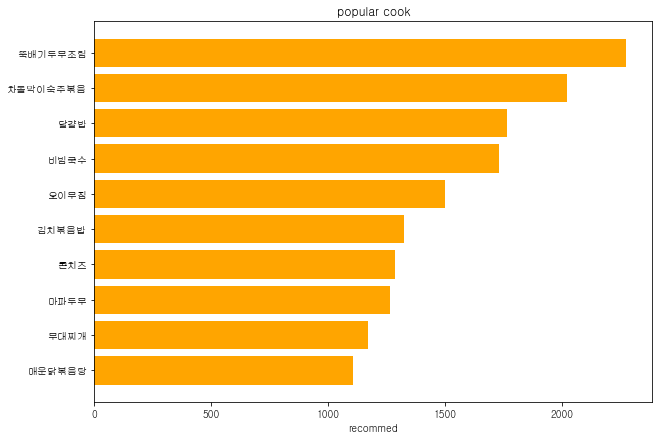

In [29]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.figure(figsize=(10,7))
plt.barh(df3['name'].head(10), df3['recomm'].head(10), align='center', color = 'orange')
plt.gca().invert_yaxis()
plt.xlabel("recommed")
plt.title("popular cook")

In [30]:
df3[['name','recomm']].head(10)

,name,recomm
0,뚝배기두부조림,2270
1,차돌박이숙주볶음,2021
2,달걀밥,1763
3,비빔국수,1730
4,오이무침,1499
5,김치볶음밥,1324
6,콘치즈,1283
7,마파두부,1264
8,부대찌개,1168
9,매운닭볶음탕,1105


## 레시피 갯수에 따른 워드클라우드
#### 동일한 메뉴지만 레시피 갯수가 많은 메뉴 확인

### 데이터 준비(중복값이 제거되기 전 데이터 사용)

In [31]:
df1.shape

(128400, 18)

In [32]:
df1.head(2)

,RCP_SNO,RCP_TTL,CKG_NM,RGTR_ID,RGTR_NM,INQ_CNT,RCMM_CNT,SRAP_CNT,CKG_MTH_ACTO_NM,CKG_STA_ACTO_NM,CKG_MTRL_ACTO_NM,CKG_KND_ACTO_NM,CKG_IPDC,CKG_MTRL_CN,CKG_INBUN_NM,CKG_DODF_NM,CKG_TIME_NM,FIRST_REG_DT
0,128671,어묵김말이,어묵김말이,skfo0701,꽃날,9592,6,66,튀김,간식,가공식품류,디저트,맛있는 김말이에 쫄깃함을 더한 어묵 김말이예요-,[재료] 어묵 2개| 김밥용김 3장| 당면 1움큼| 양파 1/2개| 당근 1/2개|...,2인분,초급,60분이내,2.007000e+13
1,128892,두부에 꼬리가 달렸어요!!,알밥,skfo0701,꽃날,5538,3,26,부침,일상,해물류,밑반찬,꼬리가 너-무- 매력적인 두부새우전. 두부와 야채를 한번에!! 영양까지 만점인 두부...,[재료] 두부 1/2모| 당근 1/2개| 고추 2개| 브로콜리 1/4개| 새우 4마...,3인분,초급,30분이내,2.007000e+13


In [33]:
new_df = df1["CKG_NM"].value_counts()

In [34]:
new_df

두부조림             435
잡채               377
닭볶음탕             371
떡볶이              345
제육볶음             326
                ... 
계란어묵탕              1
모카시나몬롤             1
닭가슴살김치볶음           1
훈제닭가슴살프렌치토스트롤      1
양배추스프커리            1
Name: CKG_NM, Length: 38567, dtype: int64

#### 엑셀 데이터에 컬럼 정리 후 CSV 파일로 저장

In [35]:
new_df.to_excel(excel_writer='food_counts.xlsx')

In [36]:
fc = pd.read_csv('food_counts.CSV', encoding='cp949')

In [37]:
fc.head(3)

,food_name,counts
0,두부조림,435
1,잡채,377
2,닭볶음탕,371


In [38]:
fc.shape

(38567, 2)

In [39]:
fc.sort_values('counts',ascending=False)

,food_name,counts
0,두부조림,435
1,잡채,377
2,닭볶음탕,371
3,떡볶이,345
4,제육볶음,326
...,...,...
20977,모카크림치즈번,1
20976,차돌박이라볶이,1
20975,콩나물곤약냉채,1
20974,청오이피클,1


### 워드클라우드 그리기

In [40]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

#### 워드클라우드 마스크 아이콘 불러오기

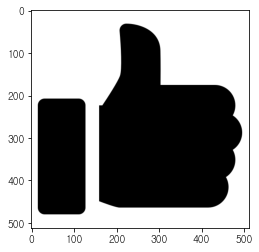

In [41]:
icon = Image.open('thumbup_mask.png')
plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

In [42]:
freq = fc.set_index("food_name").to_dict()["counts"]

In [43]:
freq

{'두부조림': 435,
 '잡채': 377,
 '닭볶음탕': 371,
 '떡볶이': 345,
 '제육볶음': 326,
 '어묵볶음': 325,
 '소고기무국': 306,
 '무생채': 306,
 '오징어볶음': 279,
 '김치볶음밥': 278,
 '김밥': 257,
 '소고기미역국': 255,
 '오이무침': 249,
 '콩나물무침': 245,
 '된장찌개': 242,
 '감자전': 233,
 '감자조림': 220,
 '멸치볶음': 215,
 '깍두기': 197,
 '오이소박이': 192,
 '돼지고기김치찌개': 190,
 '부대찌개': 188,
 '비빔국수': 187,
 '오이지무침': 184,
 '순두부찌개': 182,
 '계란말이': 179,
 '계란찜': 179,
 '갈치조림': 177,
 '김치찌개': 177,
 '가지볶음': 177,
 '고구마맛탕': 170,
 '샌드위치': 169,
 '미역줄기볶음': 167,
 '소불고기': 166,
 '오므라이스': 165,
 '돼지갈비찜': 162,
 '잔치국수': 161,
 '프렌치토스트': 159,
 '콩나물국': 157,
 '어묵탕': 155,
 '소세지야채볶음': 155,
 '연근조림': 155,
 '토스트': 146,
 '순대볶음': 143,
 '찹스테이크': 142,
 '감자볶음': 141,
 '청국장찌개': 138,
 '시금치무침': 137,
 '콩나물불고기': 137,
 '진미채볶음': 135,
 '참치김치찌개': 135,
 '배추겉절이': 135,
 '볶음밥': 133,
 '길거리토스트': 133,
 '메추리알장조림': 133,
 '골뱅이무침': 132,
 '굴전': 131,
 '애호박전': 131,
 '파김치': 130,
 '마파두부': 129,
 '고등어조림': 127,
 '국물떡볶이': 127,
 '우엉조림': 126,
 '감자채볶음': 125,
 '애호박볶음': 124,
 '콩나물밥': 123,
 '유부초밥': 123,
 '도토리묵무침': 123,
 '깻잎김치': 122,
 '김치전

In [44]:
wordcloud = WordCloud(
font_path="C:\Windows\Fonts\gulim.ttc",
    background_color = "white",
width = 800,
height = 800,
mask = mask
)

In [45]:
food_name = wordcloud.generate_from_frequencies(freq)
array = food_name.to_array()

#### 많은 레시피를 가진 메뉴를 한눈에 확인 가능

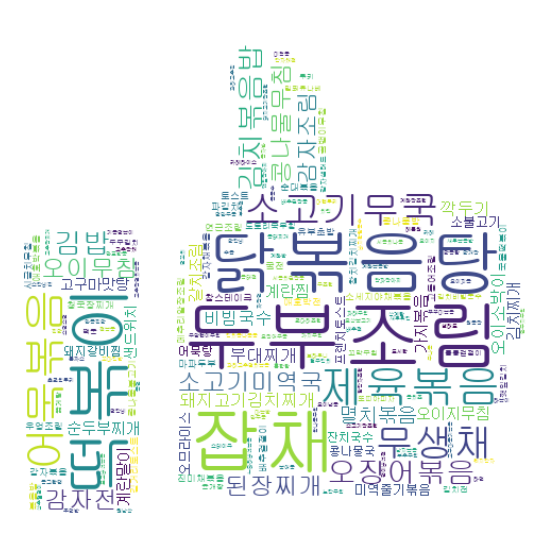

In [46]:
plt.figure(figsize=(10,10))
plt.imshow(array, interpolation ="bilinear")
plt.axis("off")
plt.show()

In [47]:
fc[fc['food_name'] == '두부조림']

,food_name,counts
0,두부조림,435


#### 가장 많은 레시피를 가진 '두부조림'의 레시피들 중 추천수가 높은 기준으로 데이터 확인

In [48]:
df1[df1['CKG_NM'] == '두부조림'].sort_values('RCMM_CNT',ascending=False).head(3)

,RCP_SNO,RCP_TTL,CKG_NM,RGTR_ID,RGTR_NM,INQ_CNT,RCMM_CNT,SRAP_CNT,CKG_MTH_ACTO_NM,CKG_STA_ACTO_NM,CKG_MTRL_ACTO_NM,CKG_KND_ACTO_NM,CKG_IPDC,CKG_MTRL_CN,CKG_INBUN_NM,CKG_DODF_NM,CKG_TIME_NM,FIRST_REG_DT
15451,4588059,고소한 두부조림,두부조림,dollshouse,돌하우스,467418,325,13157,조림,일상,콩/견과류,밑반찬,짭조름 매콤한 두부조림 만드는 법 알려드립니다.,[재료] 두부 1모| 식용유 약간 [양념] 진간장 5스푼| 설탕 1/2스푼| 고춧가...,2인분,초급,30분이내,2.013000e+13
13823,4102401,두부조림 만드는법,두부조림,dollshouse,돌하우스,222588,189,11376,조림,일상,콩/견과류,밑반찬,영양만점 두부를 이용해 두부조림을 해봅시다.,[재료] 두부 290g [양념] 진간장 7스푼| 송송썰은파 3스푼| 다진마늘 1/3...,2인분,초급,30분이내,2.012100e+13
52591,6864036,초보 주부도 쉽게 만들어 먹는 두부조림,두부조림,kjo9891,집밥아줌마,30715,148,1105,조림,일상,콩/견과류,밑반찬,안녕하세요 저희 가족 두부를 좋아해 자주 만들어 먹는 두부조림을 오늘도 맛있고 스피...,[재료] 두부 1/2모| 대파 1/4개| 소금 3꼬집 [양념] 마늘 1/3수저| 진...,2인분,아무나,30분이내,2.017000e+13


## 컨텐츠 기반 필터링
### 재료 유사도를 통한 추천 메뉴

In [49]:
df3 = df3.dropna()

In [50]:
df3.head()

,name,view,recomm,cook_m,purpo,kinds,ingred,level
0,뚝배기두부조림,355493,2270,조림,영양식,콩/견과류,[재료] 두부 1모| 양파 1개| 달걀 1~2개 [양념장] 다진마늘 2T| 청양고추...,아무나
1,차돌박이숙주볶음,649057,2021,볶음,술안주,소고기,[필수 재료] 차돌박이 300g| 숙주 200g| 송송 썬 쪽파 2T [양념 재료]...,아무나
2,달걀밥,447383,1763,기타,초스피드,달걀/유제품,[필수 재료] 밥 1/2공기| 달걀 2개| 물 100ml| 햄 or 스팸 1/4개(...,아무나
3,비빔국수,507526,1730,비빔,초스피드,밀가루,[재료] 소면 2인분 [양념장] 다진 마늘 1/2큰 술| 맛술 1큰 술| 고추장 2...,초급
4,오이무침,323274,1499,무침,일상,채소류,[오이무침 재료] 오이 4개| 소금 1/2큰술| 까나리액젓 1큰술| 설탕 1/3큰술...,아무나


In [51]:
df3.shape

(4002, 8)

In [52]:
df3 = df3.reset_index(drop=True)

### 재료(ingred) 내의 특수문자, 숫자, 불필요한 단어 제거

In [53]:
df3['ingred'].head(3)

0    [재료] 두부 1모| 양파 1개| 달걀 1~2개 [양념장] 다진마늘 2T| 청양고추...
1    [필수 재료] 차돌박이 300g| 숙주 200g| 송송 썬 쪽파 2T [양념 재료]...
2    [필수 재료] 밥 1/2공기| 달걀 2개| 물 100ml| 햄 or 스팸 1/4개(...
Name: ingred, dtype: object

In [54]:
df3['ingred'].str[0].loc[0]

'['

In [55]:
df3['ingred'] = df3['ingred'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)

In [56]:
df3['ingred'].head(3)

0     재료  두부 1모  양파 1개  달걀 1 2개  양념장  다진마늘 2T  청양고추...
1     필수 재료  차돌박이 300g  숙주 200g  송송 썬 쪽파 2T  양념 재료 ...
2     필수 재료  밥 1 2공기  달걀 2개  물 100ml  햄 or 스팸 1 4개 ...
Name: ingred, dtype: object

In [57]:
df3['ingred']=df3['ingred'].str.replace(pat=r'[0-9]', repl= r'', regex=True)

In [58]:
df3['ingred']= df3['ingred'].str.replace(pat=r'[a-z]', repl= r'', regex=True)

In [59]:
df3['ingred']=df3['ingred'].str.replace(pat=r'[A-Z]', repl= r'', regex=True)

In [60]:
df3['ingred'].head(3)

0     재료  두부 모  양파 개  달걀  개  양념장  다진마늘   청양고추  개  고...
1     필수 재료  차돌박이   숙주   송송 썬 쪽파   양념 재료  간장   굴소스 ...
2     필수 재료  밥  공기  달걀 개  물   햄  스팸  개    다진 대파   피...
Name: ingred, dtype: object

In [61]:
df3['ingred']= df3['ingred'].str.replace('개','')
df3['ingred']= df3['ingred'].str.replace('필수','')
df3['ingred']= df3['ingred'].str.replace('재료','')
df3['ingred']= df3['ingred'].str.replace('컵','')
df3['ingred']= df3['ingred'].str.replace('공기','')
df3['ingred']= df3['ingred'].str.replace('숟가락','')
df3['ingred']= df3['ingred'].str.replace('스푼','')
df3['ingred']= df3['ingred'].str.replace('국자','')
df3['ingred']= df3['ingred'].str.replace('티스푼','')
df3['ingred']= df3['ingred'].str.replace('큰','')
df3['ingred']= df3['ingred'].str.replace('작은','')
df3['ingred']= df3['ingred'].str.replace('큰술','')
df3['ingred']= df3['ingred'].str.replace('모','')
df3['ingred']= df3['ingred'].str.replace('인분','')
df3['ingred']= df3['ingred'].str.replace('채썬것','')
df3['ingred']= df3['ingred'].str.replace('썬것','')
df3['ingred']= df3['ingred'].str.replace('채','')
df3['ingred']= df3['ingred'].str.replace('술','')
df3['ingred']= df3['ingred'].str.replace('양념','')
df3['ingred']= df3['ingred'].str.replace('약간','')
df3['ingred']= df3['ingred'].str.replace('송송','')
df3['ingred']= df3['ingred'].str.replace('썬','')
df3['ingred']= df3['ingred'].str.replace('선택','')
df3['ingred']= df3['ingred'].str.replace('캔','')
df3['ingred']= df3['ingred'].str.replace('통','')
df3['ingred']= df3['ingred'].str.replace('적당량','')
df3['ingred']= df3['ingred'].str.replace('취향것','')
df3['ingred']= df3['ingred'].str.replace('기호에맞게','')
df3['ingred']= df3['ingred'].str.replace('만큼','')
df3['ingred']= df3['ingred'].str.replace('썰은것','')
df3['ingred']= df3['ingred'].str.replace('국그릇','')
df3['ingred']= df3['ingred'].str.replace('토막','')
df3['ingred']= df3['ingred'].str.replace('숟갈','')
df3['ingred']= df3['ingred'].str.replace('장','')

In [62]:
df3['ingred'].head(3)

0       두부   양파   달걀      다진마늘   청양고추    고춧가루   설탕 ...
1        차돌박이   숙주     쪽파      간   굴소스   고추기름   다진마...
2        밥    달걀   물   햄  스팸      다진 대파   피자치즈    슬...
Name: ingred, dtype: object

In [63]:
df3.head()

,name,view,recomm,cook_m,purpo,kinds,ingred,level
0,뚝배기두부조림,355493,2270,조림,영양식,콩/견과류,두부 양파 달걀 다진마늘 청양고추 고춧가루 설탕 ...,아무나
1,차돌박이숙주볶음,649057,2021,볶음,술안주,소고기,차돌박이 숙주 쪽파 간 굴소스 고추기름 다진마...,아무나
2,달걀밥,447383,1763,기타,초스피드,달걀/유제품,밥 달걀 물 햄 스팸 다진 대파 피자치즈 슬...,아무나
3,비빔국수,507526,1730,비빔,초스피드,밀가루,소면 다진 마늘 맛 고추 진간 고춧가루 설...,초급
4,오이무침,323274,1499,무침,일상,채소류,오이무침 오이 소금 까나리액젓 설탕 마늘 쪽파 조금 깨...,아무나


In [64]:
indices = pd.Series(df3.index, index=df3['name'])

In [65]:
indices

name
뚝배기두부조림         0
차돌박이숙주볶음        1
달걀밥             2
비빔국수            3
오이무침            4
             ... 
삼겹살꽈리고추조림    3997
고구마찹쌀스틱      3998
감자파스타        3999
부추굴전         4000
옥수수모닝빵       4001
Length: 4002, dtype: int64

### TF-IDF Vectorizer

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [67]:
tfidf_matrix = tfidf.fit_transform(df3['ingred'])

In [68]:
tfidf_matrix.shape

(4002, 3565)

### 코사인유사도 구하기

In [69]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [70]:
cosine_sim

array([[1.        , 0.13354921, 0.15126795, ..., 0.03764549, 0.1235168 ,
        0.07269348],
       [0.13354921, 1.        , 0.04566158, ..., 0.        , 0.06473138,
        0.0166587 ],
       [0.15126795, 0.04566158, 1.        , ..., 0.        , 0.21285842,
        0.05784906],
       ...,
       [0.03764549, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.1235168 , 0.06473138, 0.21285842, ..., 0.        , 1.        ,
        0.08200875],
       [0.07269348, 0.0166587 , 0.05784906, ..., 0.        , 0.08200875,
        1.        ]])

In [71]:
cosine_sim.shape

(4002, 4002)

### 재료의 유사도가 높은 순으로 메뉴명이 나오도록 함수 정의

In [72]:
df3['name'].head(10)

0     뚝배기두부조림
1    차돌박이숙주볶음
2         달걀밥
3        비빔국수
4        오이무침
5       김치볶음밥
6         콘치즈
7        마파두부
8        부대찌개
9      매운닭볶음탕
Name: name, dtype: object

In [73]:
df3.iloc[[7]]

,name,view,recomm,cook_m,purpo,kinds,ingred,level
7,마파두부,210261,1264,볶음,일상,돼지고기,두부 대파 줄기 청양고추 양파 돼지고기 간것 고추가루 ...,초급


In [74]:
def food_recommend(name, cosine_sim=cosine_sim) :
    idx = indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    food_indices = [i[0] for i in sim_scores]
    return df3['name'].iloc[food_indices]

In [75]:
food_recommend('차돌된장찌개')

2524      차돌박이강된장
1369     애호박고추장찌개
1420    차돌박이고추장찌개
2533          고추전
1210     표고버섯된장찌개
1669        멸치칼국수
3570       차돌박이쌈장
520      차돌박이된장찌개
1919     차돌박이부추무침
2749      물떡어묵꼬치탕
Name: name, dtype: object

In [76]:
food_recommend('스팸동')

179        햄양파링전
290       스팸하트김밥
216      스팸계란주먹밥
135        간장달걀밥
289        감자짜글이
867      스팸돈부리덮밥
2759       양파볶음밥
52          양파덮밥
978     양파볶음햄구이밥
20      베이컨마늘볶음밥
Name: name, dtype: object

In [77]:
food_recommend('비빔국수')

1119      비빔국수양념장
772             면
453         오이초무침
3963        꼬막초무침
718        고등어무조림
1807         냉이무침
949     느타리버섯양념구이
1098    초고추장골뱅이무침
1149         참치쌈장
2446       가지구이무침
Name: name, dtype: object

In [78]:
food_recommend('베이컨치즈말이')

2000        베이컨에그컵
773       베이컨말이주먹밥
944         베이컨주먹밥
764     베이컨계란말이주먹밥
196          베이컨말이
3227      새우버터치즈구이
1659           김무침
2584       오이소고기볶음
2463       베이컨야채말이
2011      에그마요샌드위치
Name: name, dtype: object

In [79]:
food_recommend('죠리퐁쉐이크')

1610    오레오프라프치노
2507       허니브레드
845      딸기바나나쥬스
1437        도지마롤
2876       밀크캐러멜
3602       고구마튀김
3336       캐러멜푸딩
2451    초코피칸브라우니
790        에그타르트
2620       오이냉국수
Name: name, dtype: object

In [80]:
food_recommend('감자짜글이')

3781     햄고추장찌개
219      참치감자조림
3699    고추장감자볶음
170       스팸감자탕
49         닭볶음탕
2030     감자호박찌개
290      스팸하트김밥
14         장칼국수
1193    매운돼지갈비찜
723      감자어묵볶음
Name: name, dtype: object

## 조리법, 목적, 분류, 난이도를 기반으로 추천
#### 조리법(cook_m), 목적(purpo), 분류(kinds), 난이도(level)

In [81]:
from ast import literal_eval

In [82]:
df3.head(10)

,name,view,recomm,cook_m,purpo,kinds,ingred,level
0,뚝배기두부조림,355493,2270,조림,영양식,콩/견과류,두부 양파 달걀 다진마늘 청양고추 고춧가루 설탕 ...,아무나
1,차돌박이숙주볶음,649057,2021,볶음,술안주,소고기,차돌박이 숙주 쪽파 간 굴소스 고추기름 다진마...,아무나
2,달걀밥,447383,1763,기타,초스피드,달걀/유제품,밥 달걀 물 햄 스팸 다진 대파 피자치즈 슬...,아무나
3,비빔국수,507526,1730,비빔,초스피드,밀가루,소면 다진 마늘 맛 고추 진간 고춧가루 설...,초급
4,오이무침,323274,1499,무침,일상,채소류,오이무침 오이 소금 까나리액젓 설탕 마늘 쪽파 조금 깨...,아무나
5,김치볶음밥,366065,1324,볶음,일상,쌀,밥 다진 양파 다진 김치 다진 햄 설탕 김칫국물 ...,아무나
6,콘치즈,341718,1283,볶음,술안주,가공식품류,옥수수조림 버터 마요네즈 피자치즈 파슬리,아무나
7,마파두부,210261,1264,볶음,일상,돼지고기,두부 대파 줄기 청양고추 양파 돼지고기 간것 고추가루 ...,초급
8,부대찌개,825884,1168,끓이기,일상,가공식품류,길쭉이 햄 줄 조림 햄 사이즈 돈다짐육 베이컨이나 대패삼겹살 줌 ...,아무나
9,매운닭볶음탕,259130,1105,끓이기,손님접대,닭고기,닭고기 마리 감자 당근 양파 대파 대 물 고추 ...,초급


### 특수문자가 있는 컬럼에서 특수문자 제거

In [83]:
df3['kinds'] = df3['kinds'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)

In [84]:
df3.head(5)

,name,view,recomm,cook_m,purpo,kinds,ingred,level
0,뚝배기두부조림,355493,2270,조림,영양식,콩 견과류,두부 양파 달걀 다진마늘 청양고추 고춧가루 설탕 ...,아무나
1,차돌박이숙주볶음,649057,2021,볶음,술안주,소고기,차돌박이 숙주 쪽파 간 굴소스 고추기름 다진마...,아무나
2,달걀밥,447383,1763,기타,초스피드,달걀 유제품,밥 달걀 물 햄 스팸 다진 대파 피자치즈 슬...,아무나
3,비빔국수,507526,1730,비빔,초스피드,밀가루,소면 다진 마늘 맛 고추 진간 고춧가루 설...,초급
4,오이무침,323274,1499,무침,일상,채소류,오이무침 오이 소금 까나리액젓 설탕 마늘 쪽파 조금 깨...,아무나


In [85]:
df3.loc[0, 'purpo']

'영양식'

In [86]:
df3.loc[0, 'kinds']

'콩 견과류'

In [87]:
df3.loc[0, 'cook_m']

'조림'

In [88]:
df3.loc[0, 'level']

'아무나'

In [89]:
df3[['cook_m', 'purpo', 'kinds', 'level']].head(3)

,cook_m,purpo,kinds,level
0,조림,영양식,콩 견과류,아무나
1,볶음,술안주,소고기,아무나
2,기타,초스피드,달걀 유제품,아무나


### 4개의 컬럼의 정보를 합친 컬럼 만들기

In [90]:
def create_bow(x) :
    return x['cook_m'] + ' ' + x['purpo'] +' '+ x['kinds'] + ' '+ x['level']

In [91]:
df3['bow'] = df3.apply(create_bow, axis=1)

In [92]:
df3[['bow']].head(3)

,bow
0,조림 영양식 콩 견과류 아무나
1,볶음 술안주 소고기 아무나
2,기타 초스피드 달걀 유제품 아무나


### CountVectorizer

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

In [94]:
cnt = CountVectorizer()
cnt_matrix = cnt.fit_transform(df3['bow'])

In [95]:
cnt_matrix

<4002x44 sparse matrix of type '<class 'numpy.int64'>'
	with 15901 stored elements in Compressed Sparse Row format>

In [96]:
from sklearn.metrics.pairwise import cosine_similarity

In [97]:
cosine_sim2 = cosine_similarity(cnt_matrix,cnt_matrix)

In [98]:
indices.head(20)

name
뚝배기두부조림      0
차돌박이숙주볶음     1
달걀밥          2
비빔국수         3
오이무침         4
김치볶음밥        5
콘치즈          6
마파두부         7
부대찌개         8
매운닭볶음탕       9
감자조림        10
김치찌개        11
고추장아찌       12
어묵햄볶음       13
장칼국수        14
제육볶음        15
우유컵케이크      16
고등어조림       17
약밥          18
두부구이        19
dtype: int64

## 결과 확인하기
#### 추천순이 많은 순으로 오름차순 정렬되어 인덱스가 낮을 수록 추천수가 높다

In [99]:
food_recommend('오이무침', cosine_sim2)

29           깍두기
80        양파오이무침
115        무생채무침
201       고추된장박이
211    아삭이고추된장무침
224      도라지오이무침
233        시금치무침
256      시금치나물무침
320      두부시금치무침
344        배추겉절이
Name: name, dtype: object

In [100]:
food_recommend('콘치즈', cosine_sim2)

624          쏘야볶음
1646    베이컨달걀버섯볶음
1910       치즈어묵볶음
1        차돌박이숙주볶음
15           제육볶음
21          국물떡볶이
40           오뎅볶음
56         스팸마요덮밥
64        골뱅이마늘볶음
65          당면떡볶이
Name: name, dtype: object

In [101]:
food_recommend('스팸동', cosine_sim2)

188     참치맛나니
8        부대찌개
10       감자조림
40       오뎅볶음
44       만두강정
56     스팸마요덮밥
62       간장국수
69     대패두부조림
78      라면투움바
81       어묵볶음
Name: name, dtype: object

### 어떻게 비슷했는지 확인
#### 오이무침[4]과 깍두기[29],배추겉절이[344]

In [102]:
df3[['name','bow']].iloc[['4','29','344']]

,name,bow
4,오이무침,무침 일상 채소류 아무나
29,깍두기,무침 일상 채소류 아무나
344,배추겉절이,무침 일상 채소류 아무나


#### 콘치즈[6]와 쏘야볶음[624],당면떡볶이[65]

In [103]:
df3[['name','bow']].iloc[['6','624','65']]

,name,bow
6,콘치즈,볶음 술안주 가공식품류 아무나
624,쏘야볶음,볶음 술안주 가공식품류 아무나
65,당면떡볶이,볶음 간식 가공식품류 아무나


#### 스팸동[27]과 참치맛나니[188],어묵볶음[81]

In [104]:
df3[['name','bow']].iloc[['27','188','81']]

,name,bow
27,스팸동,조림 일상 가공식품류 아무나
188,참치맛나니,조림 일상 가공식품류 아무나
81,어묵볶음,볶음 일상 가공식품류 아무나


### 목적(purpo)에 따라 추천순이 높은 메뉴 10개 확인

In [105]:
df3["purpo"].value_counts()

일상      1920
간식       652
손님접대     295
초스피드     283
다이어트     206
술안주      205
도시락      178
영양식      115
기타        37
명절        37
야식        33
해장        25
이유식       16
Name: purpo, dtype: int64

#### purpo : 일상/간식/손님접대/초스피드/다이어트/술안주/도시락/영양식/명절/야식/이유식/해장/기타

In [106]:
df3[df3["purpo"] == "술안주"].head(3)

,name,view,recomm,cook_m,purpo,kinds,ingred,level,bow
1,차돌박이숙주볶음,649057,2021,볶음,술안주,소고기,차돌박이 숙주 쪽파 간 굴소스 고추기름 다진마...,아무나,볶음 술안주 소고기 아무나
6,콘치즈,341718,1283,볶음,술안주,가공식품류,옥수수조림 버터 마요네즈 피자치즈 파슬리,아무나,볶음 술안주 가공식품류 아무나
15,제육볶음,976200,915,볶음,술안주,돼지고기,돼지고기 양파 청양고추 대파 뿌리 설탕 고추 간 고...,아무나,볶음 술안주 돼지고기 아무나


In [107]:
def get_purpo(purpo) :
    menu = df3[df3["purpo"] == purpo]
    menu = menu[0:9]
    return menu[["name","recomm","ingred"]]

In [108]:
get_purpo('술안주')

,name,recomm,ingred
1,차돌박이숙주볶음,2021,차돌박이 숙주 쪽파 간 굴소스 고추기름 다진마...
6,콘치즈,1283,옥수수조림 버터 마요네즈 피자치즈 파슬리
15,제육볶음,915,돼지고기 양파 청양고추 대파 뿌리 설탕 고추 간 고...
24,김치부침개,736,김치 부침가루 종이 물 청양고추 참치 식용유
64,골뱅이마늘볶음,482,골뱅이 조림 마늘 올리브유 버터 청양고추 후추 파마...
82,밥피자,399,밥 달걀 소금 피자치즈 양파 소세지 피망 옥수수 ...
92,베이컨치즈떡말이,364,베이컨 팩 떡볶이떡 스트링치즈 후추 스위트 칠리소스
93,소불고기,355,소고기 불고기감 새송이버섯 양송이버섯 팽이버섯 파대 고추냉이...
104,골뱅이무침,334,골뱅이 대파 대 양파 오이 당근 파프리카 고춧가루 고추 ...


In [109]:
get_purpo('도시락')

,name,recomm,ingred
37,오니기리,639,밥 참치 마요네즈 볶은 김치 후추 밥 밑간 참기름 맛...
42,깻잎쌈밥,602,깻잎 밥 소금 참기름 참치 된 고추 참기름 ...
132,주먹밥,286,다진 호박 다진 빨강파프리카 다진 노랑파프리카 다진쇠고기 둥근햄...
137,꽃주먹밥,276,주먹 밥 밥 비엔나 소시지 당근 피망 호박 대파 건더기...
143,몬테크리스토,273,식빵 슬라이스치즈 슬라이스햄 달걀 알 머스타드 딸기쨈
147,크래미유부초밥,271,유부 초밥세트 분량 크래미 오이 허니머스터드 마요네즈
181,달걀샌드위치,231,달걀 식빵 체다치즈 슬라이스햄 홀그레인머스터드 마요네즈 ...
189,베이컨치즈말이,225,밥 베이컨 파프리카 양파 당근 어른치즈 파슬리가루 깨소금 참기름
190,소고기주먹밥,224,밥 다진 소고기 애호박 당근 간 설탕 후추 ...


In [110]:
def get_purpo2(purpo) :
    menu = df3[df3["purpo"] != purpo]
    menu = menu[0:9]
    return menu[["name","recomm","ingred"]]

In [111]:
get_purpo2('술안주')

,name,recomm,ingred
0,뚝배기두부조림,2270,두부 양파 달걀 다진마늘 청양고추 고춧가루 설탕 ...
2,달걀밥,1763,밥 달걀 물 햄 스팸 다진 대파 피자치즈 슬...
3,비빔국수,1730,소면 다진 마늘 맛 고추 진간 고춧가루 설...
4,오이무침,1499,오이무침 오이 소금 까나리액젓 설탕 마늘 쪽파 조금 깨...
5,김치볶음밥,1324,밥 다진 양파 다진 김치 다진 햄 설탕 김칫국물 ...
7,마파두부,1264,두부 대파 줄기 청양고추 양파 돼지고기 간것 고추가루 ...
8,부대찌개,1168,길쭉이 햄 줄 조림 햄 사이즈 돈다짐육 베이컨이나 대패삼겹살 줌 ...
9,매운닭볶음탕,1105,닭고기 마리 감자 당근 양파 대파 대 물 고추 ...
10,감자조림,1102,감자 물 간 설탕 물엿 다진 마늘 참깨 참기름
